Data Cleaning and Merging Workflow with Visualizations

1. Loading Source Datasets
------------------------------
Client data shape: (14606, 26)
Client data columns: ['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']
Price data shape: (193002, 8)
Price data columns: ['id', 'price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

Client data sample:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua 

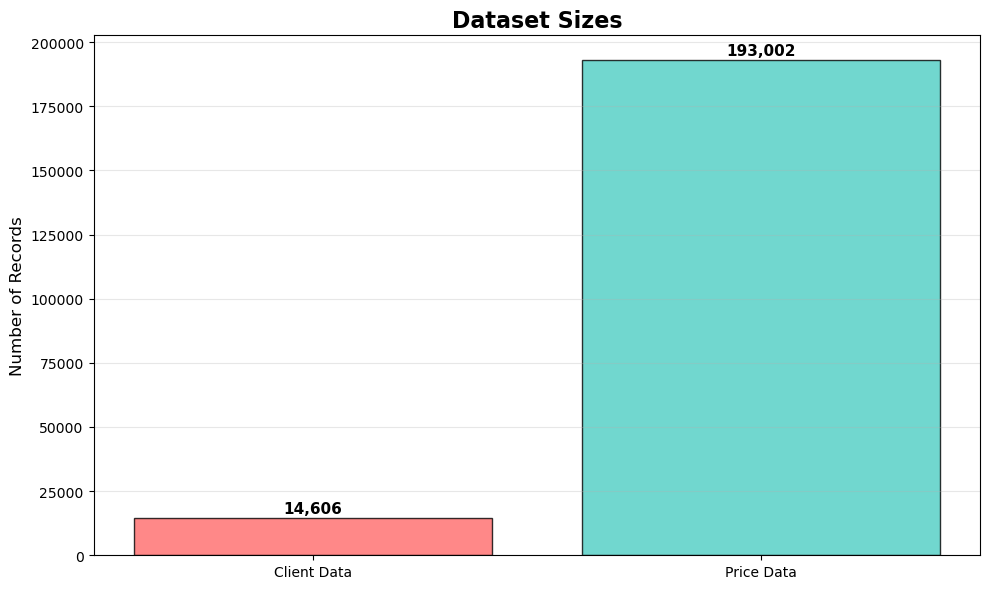

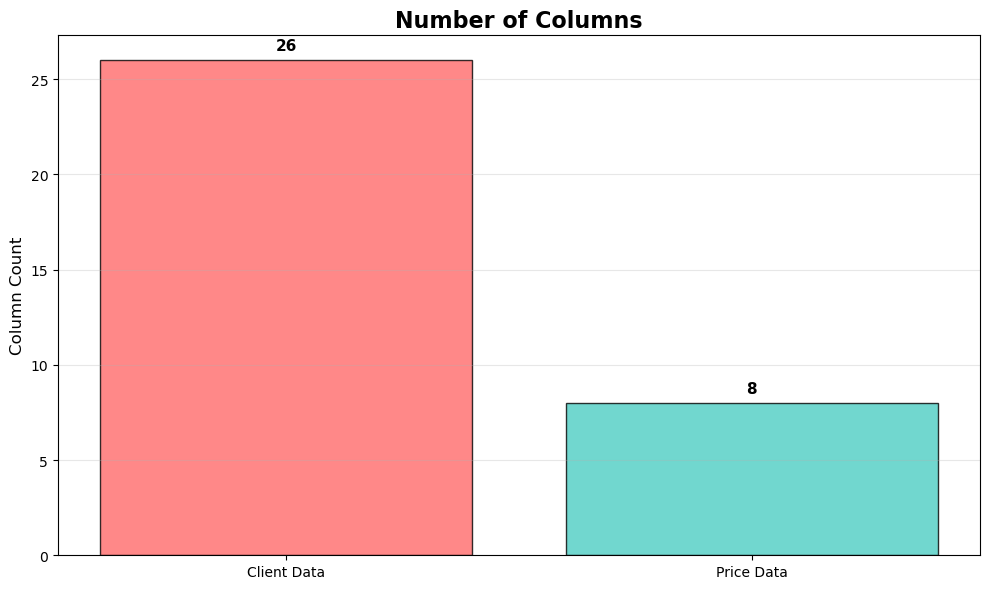

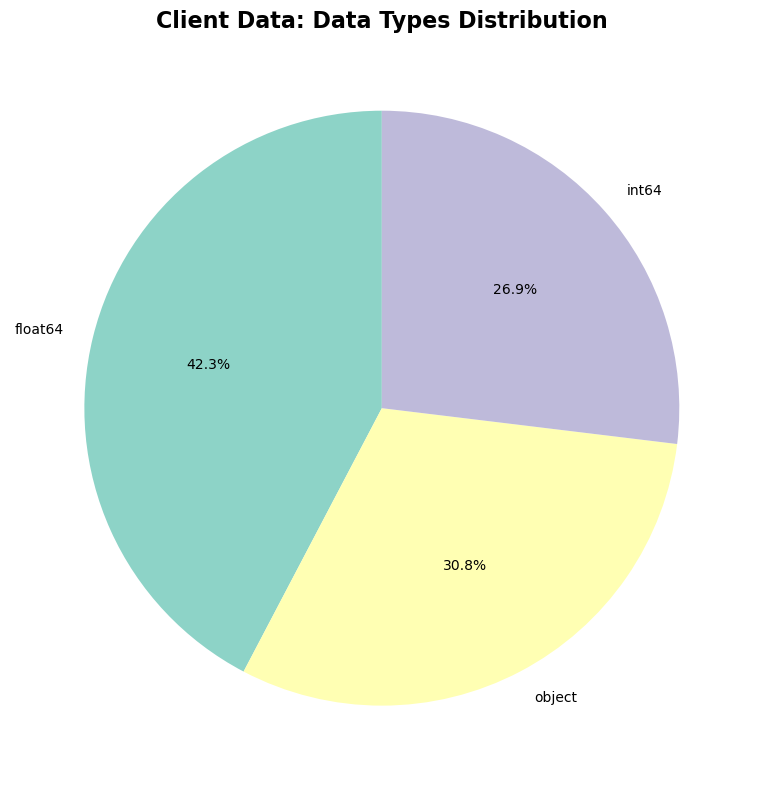

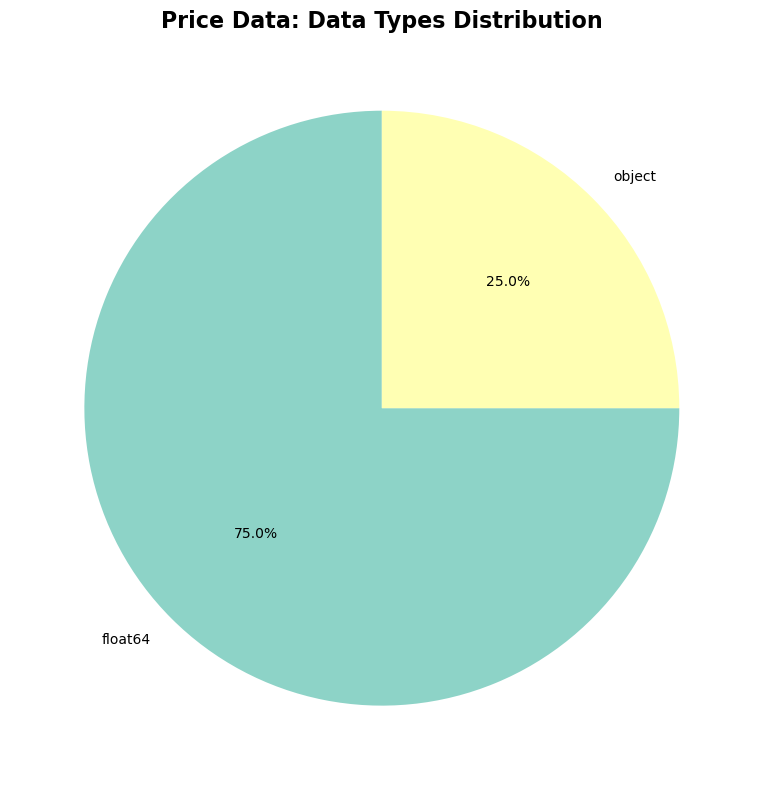


2. Data Exploration and Understanding
----------------------------------------
Client data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  


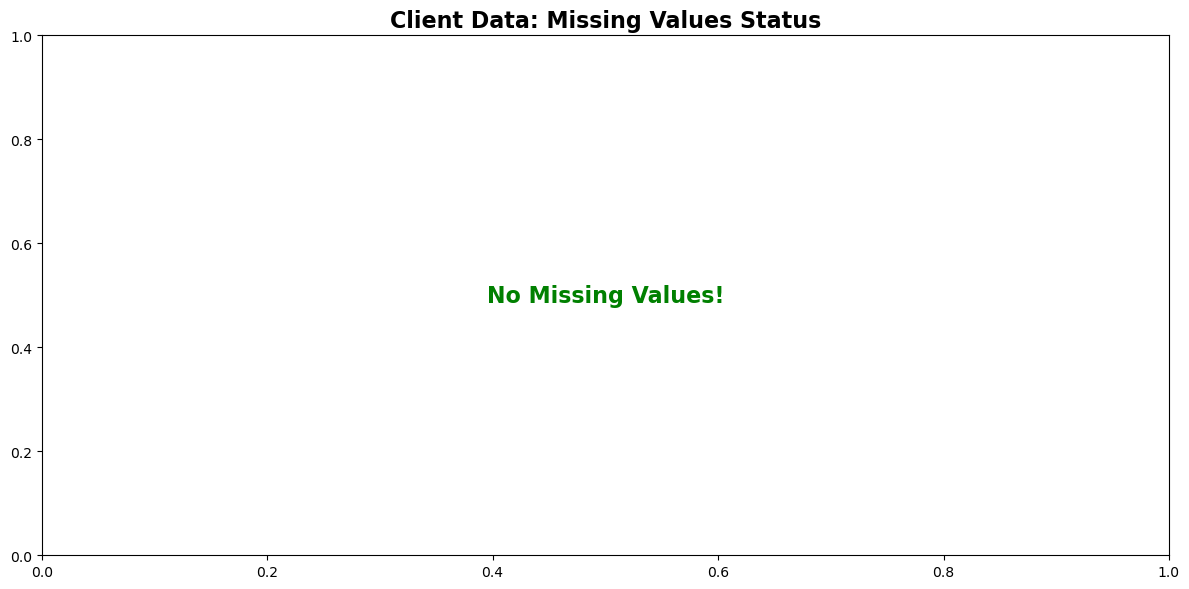

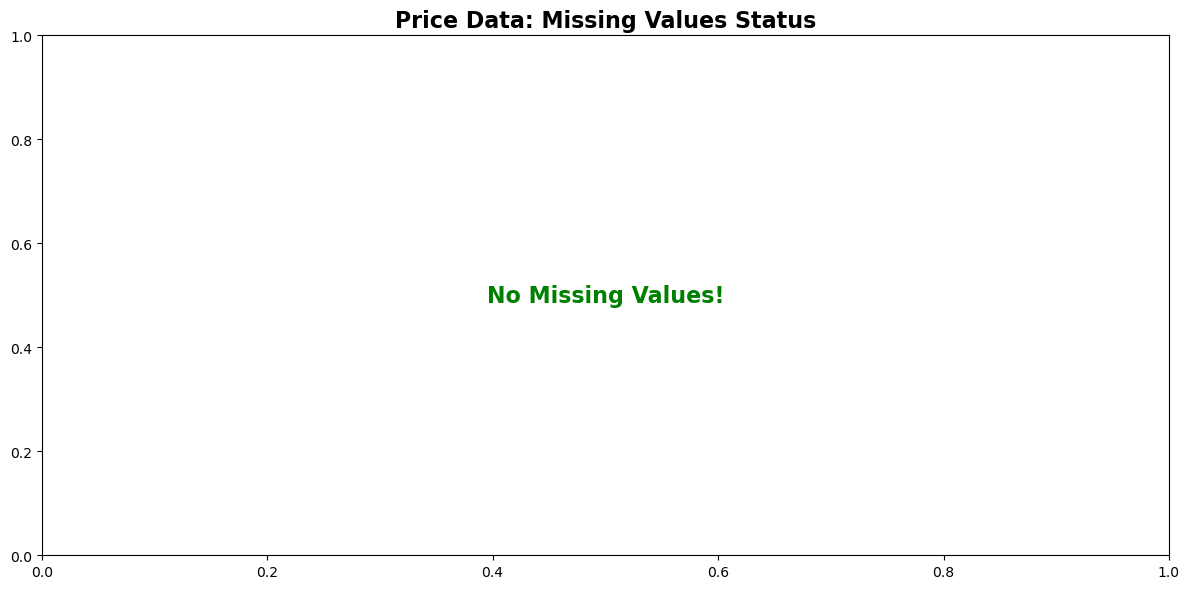

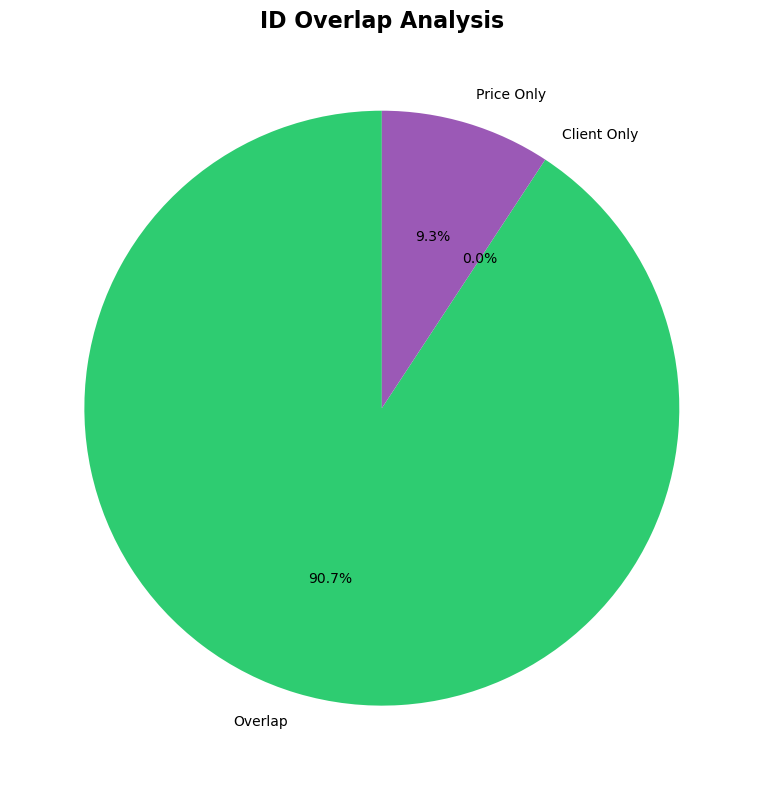

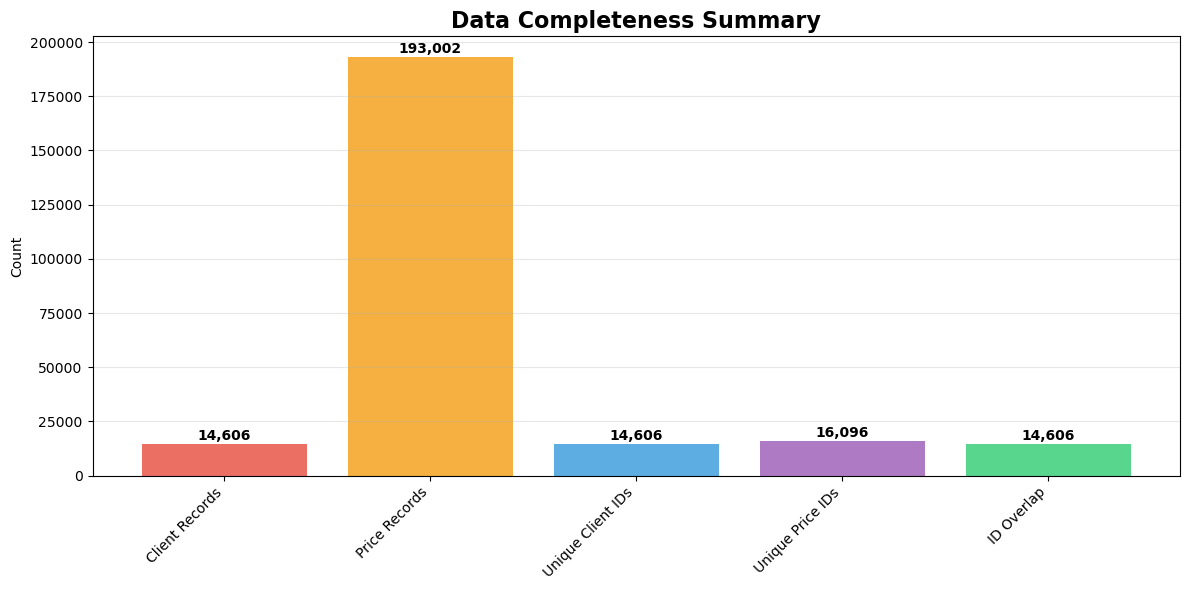


📊 VISUALIZATION 3: Churn Distribution Analysis
--------------------------------------------------


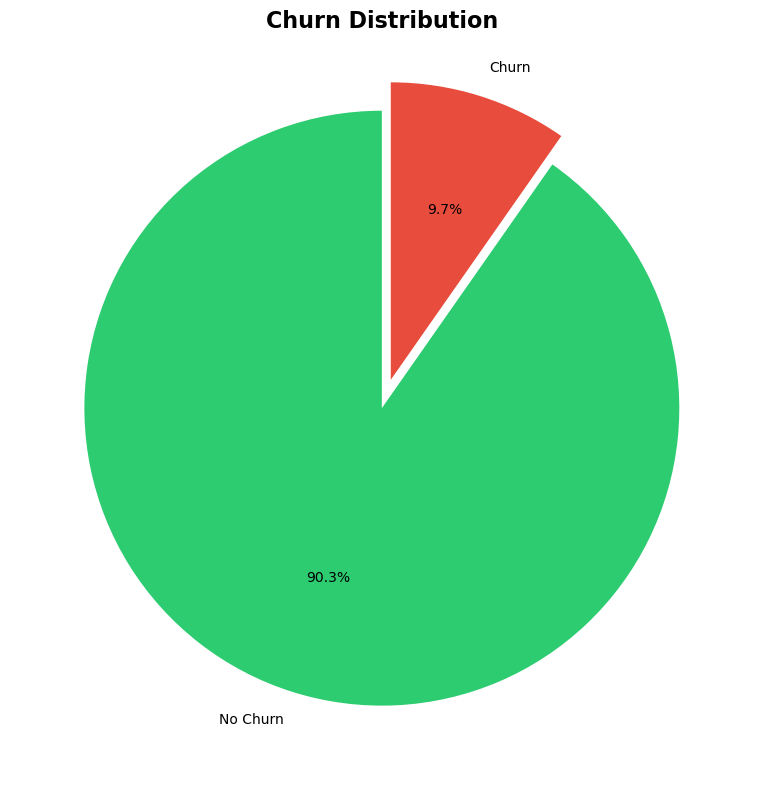

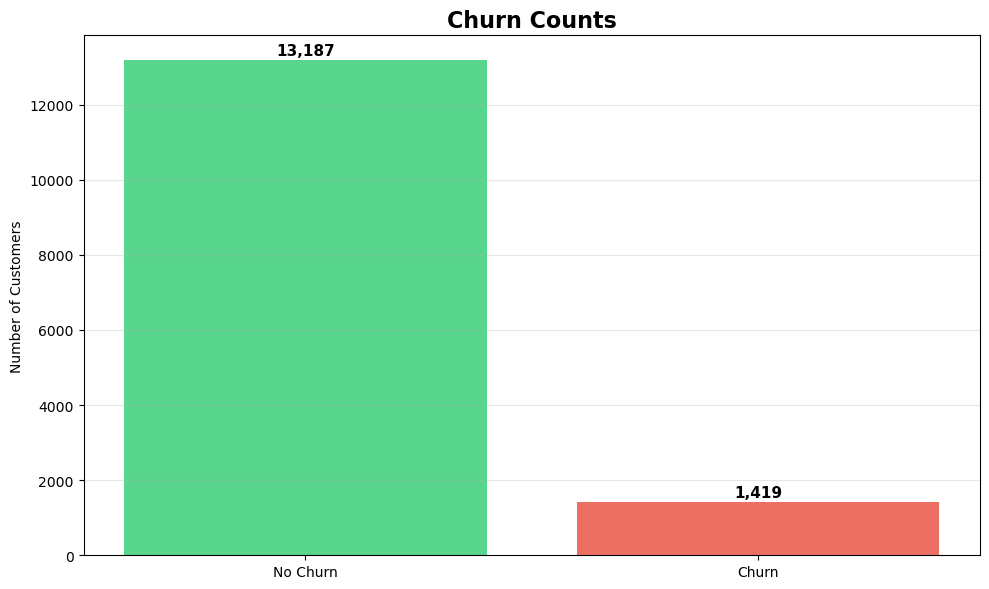

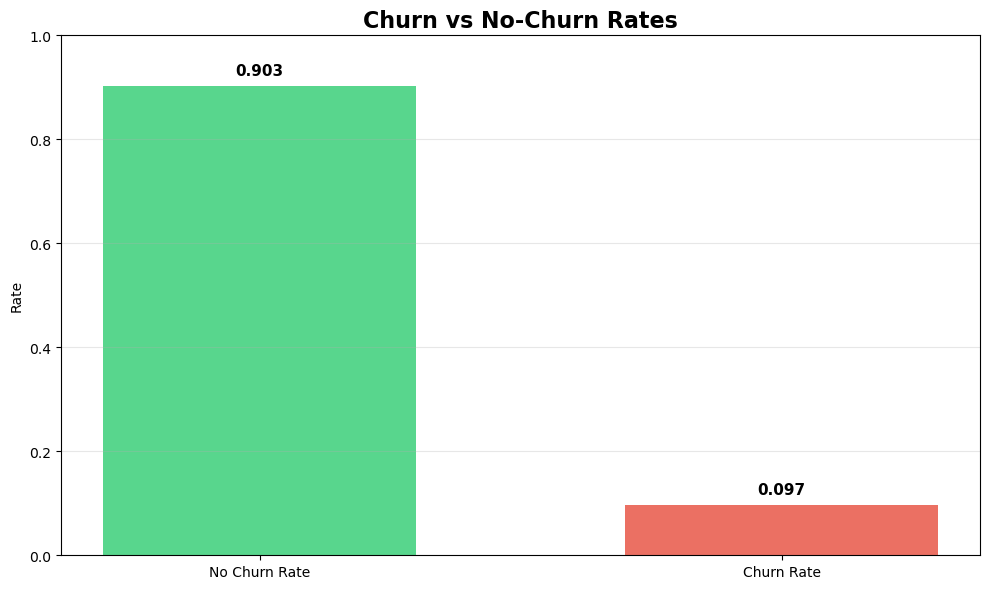


Churn Statistics Summary:
            Metric  Value
   Total Customers 14,606
 Churned Customers  1,419
Retained Customers 13,187
        Churn Rate  0.097
    Retention Rate  0.903

3. Date Column Processing
------------------------------
Date columns in client data: ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
Date columns in price data: ['price_date']

Converting date_activ:
Date range: 2003-05-09 00:00:00 to 2014-09-01 00:00:00
Epoch range: 1052438400 to 1409529600
Normalized range: 0.000 to 1.000

Converting date_end:
Date range: 2016-01-28 00:00:00 to 2017-06-13 00:00:00
Epoch range: 1453939200 to 1497312000
Normalized range: 0.000 to 1.000

Converting date_modif_prod:
Date range: 2003-05-09 00:00:00 to 2016-01-29 00:00:00
Epoch range: 1052438400 to 1454025600
Normalized range: 0.000 to 1.000

Converting date_renewal:
Date range: 2013-06-26 00:00:00 to 2016-01-28 00:00:00
Epoch range: 1372204800 to 1453939200
Normalized range: 0.000 to 1.000

Converting price_da

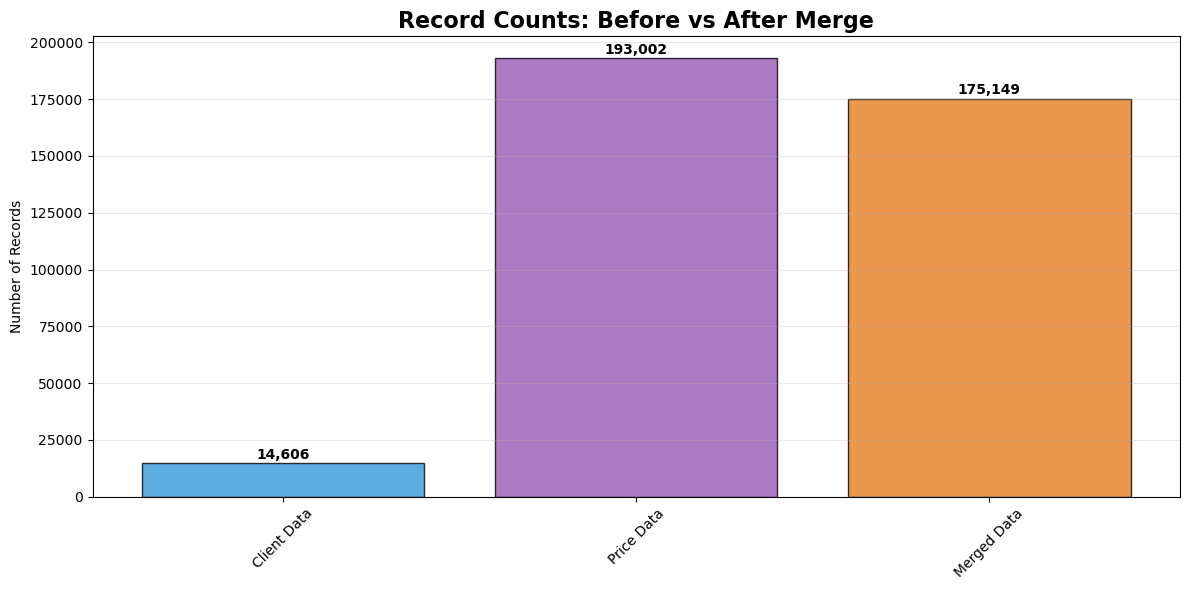

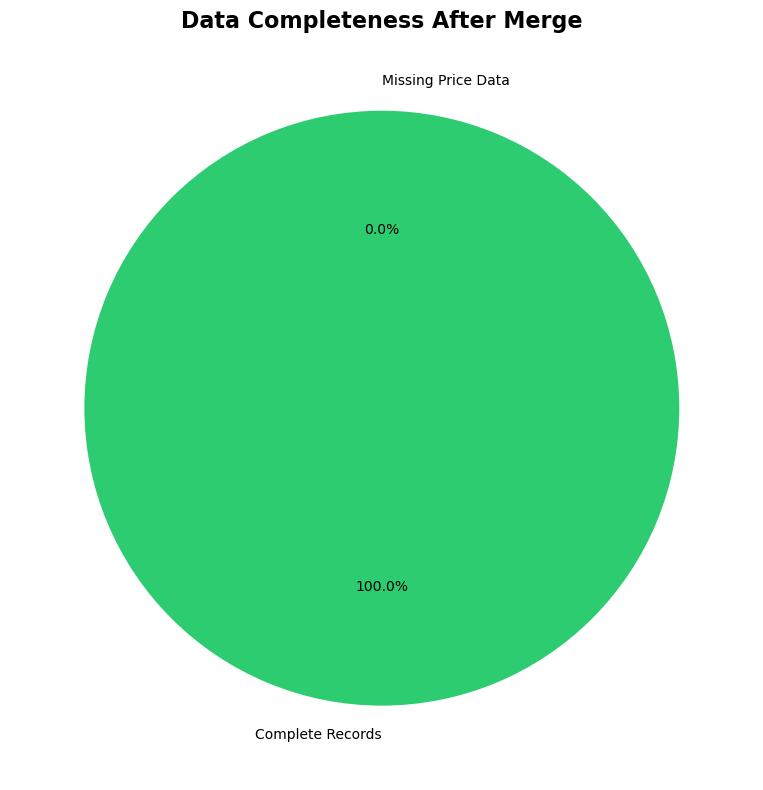

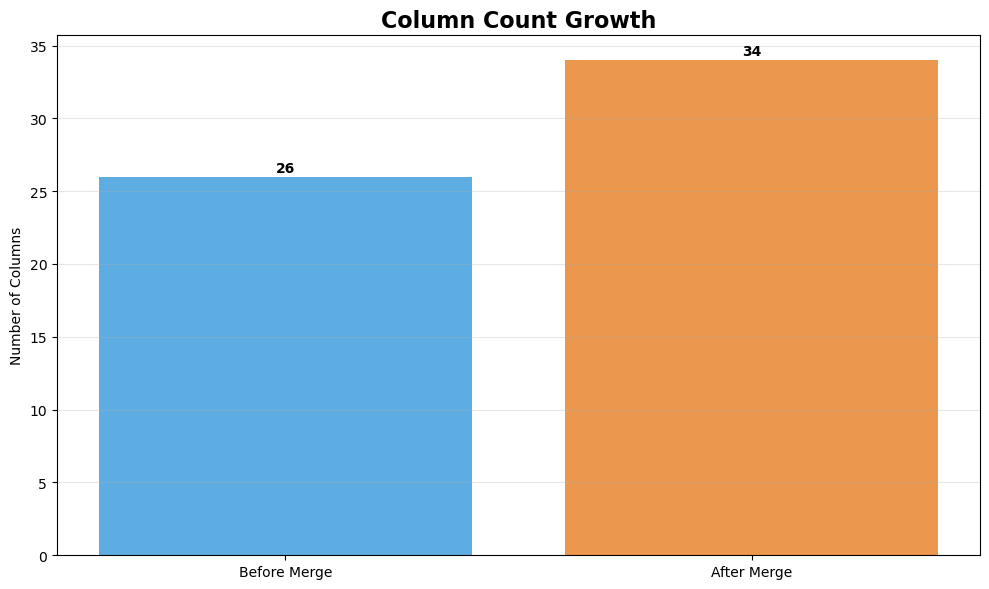


Merge Summary:
    Dataset Records  Columns
Client Data  14,606       26
 Price Data 193,002        9
Merged Data 175,149       34

5. Creating Price Statistical Features
----------------------------------------
Found price columns: ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'price_date_epoch']
Calculating price statistics per client...
Price statistics shape: (16096, 36)
Sample price statistics:
                                 id  price_off_peak_var_mean  \
0  0002203ffbb812588b632b9e628cc38d                 0.124338   
1  0004351ebdd665e6ee664792efc4fd13                 0.146426   

   price_off_peak_var_std  price_off_peak_var_min  price_off_peak_var_max  \
0                0.003976                0.119906                0.128067   
1                0.002197                0.143943                0.148405   

   price_off_peak_var_last  price_peak_var_mean  price_peak_var_std  \
0                 0.1

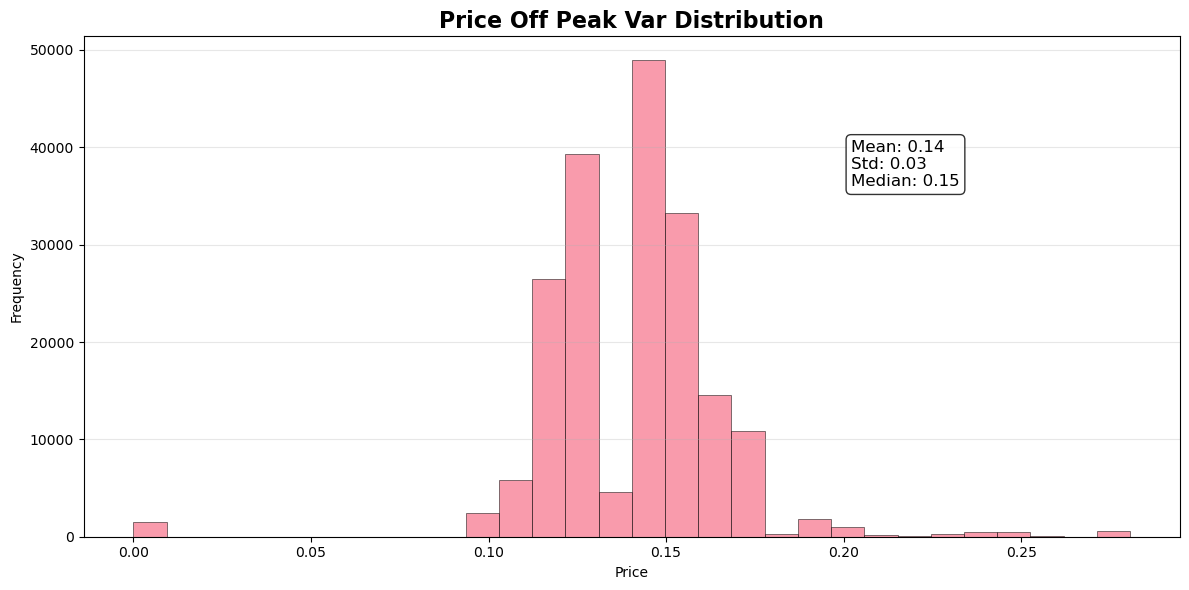

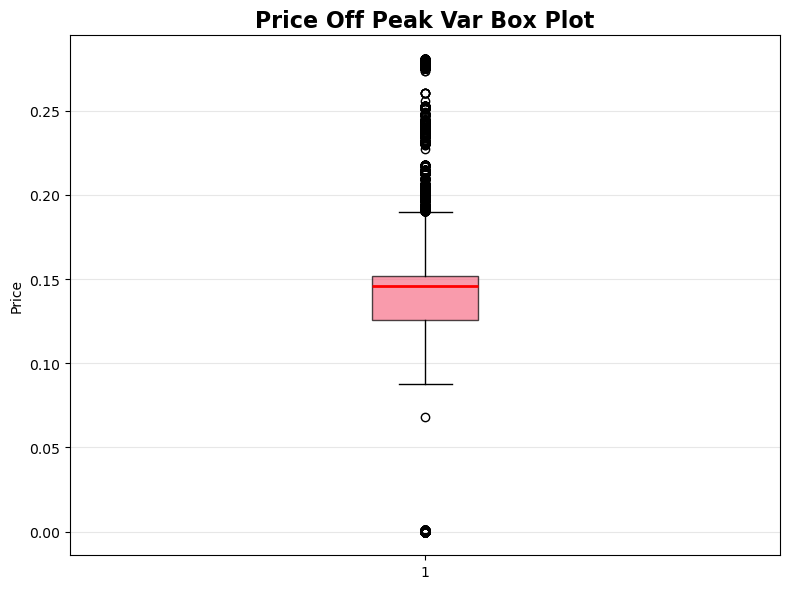

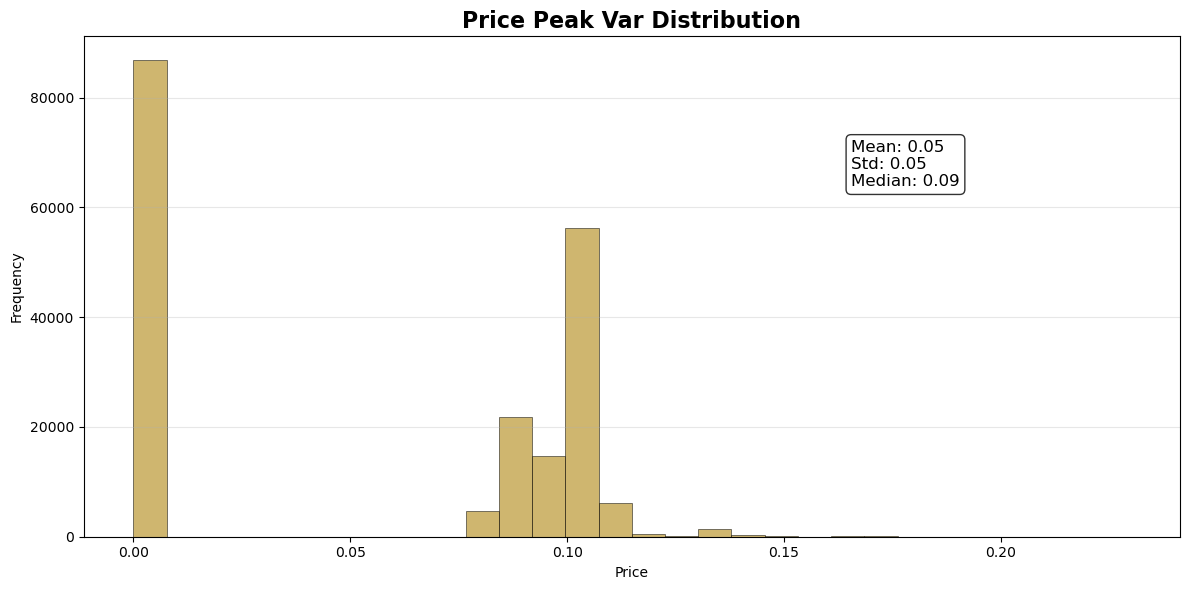

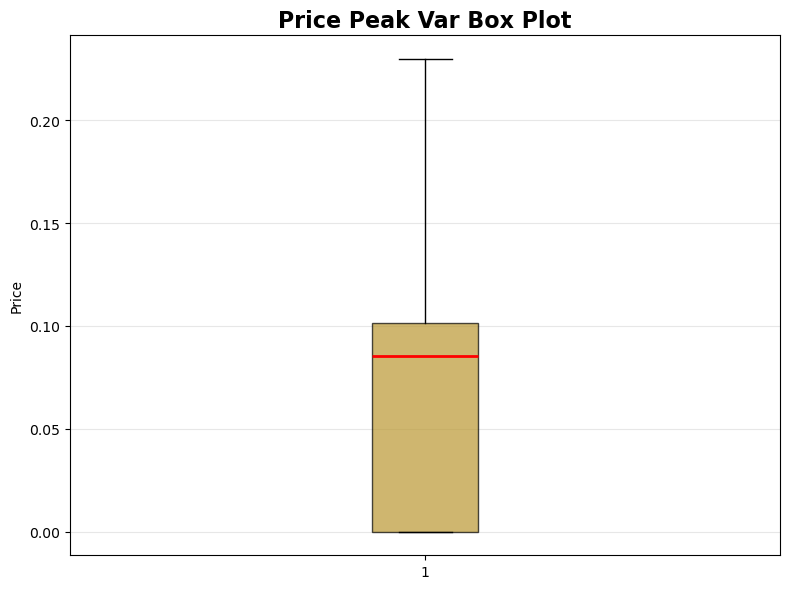

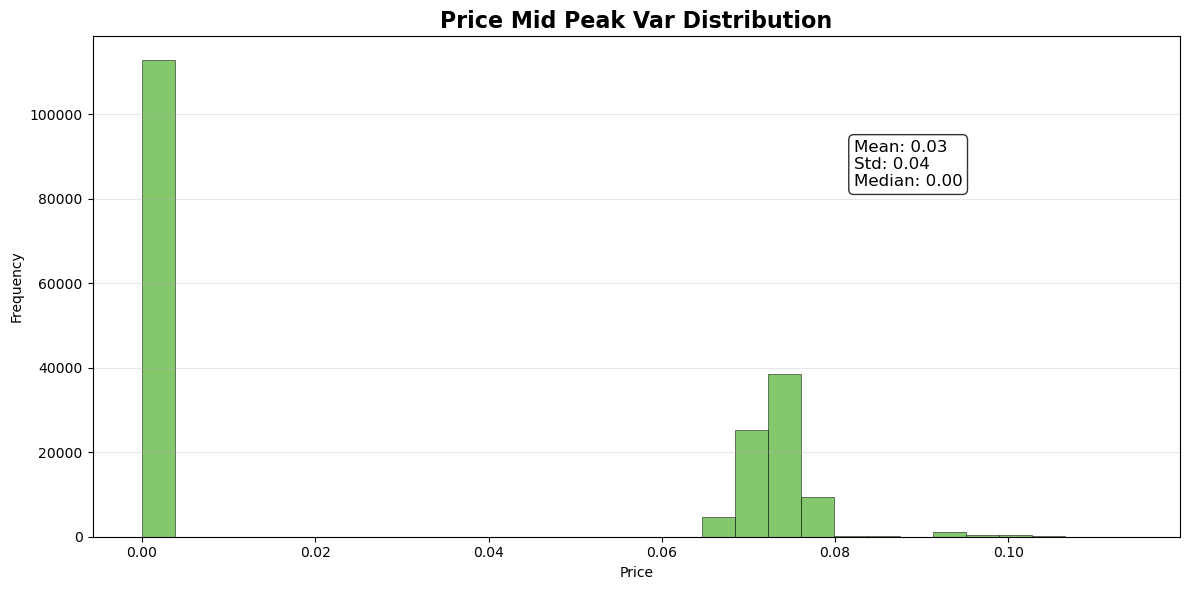

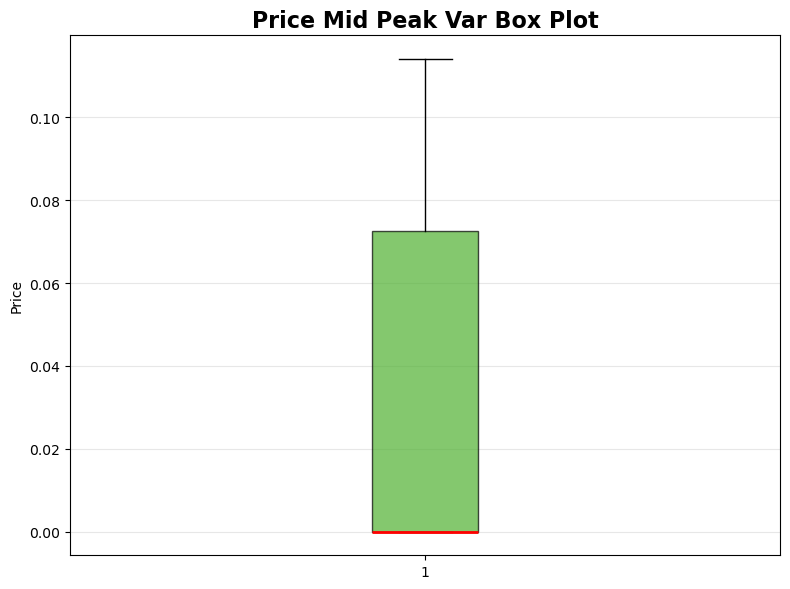


6. One-Hot Encoding Categorical Variables
------------------------------------------
Found categorical columns: ['id', 'channel_sales', 'has_gas', 'origin_up']

Unique channel_sales values:
channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64
Created 8 dummy variables for channel_sales:
['channel_sales_MISSING', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci', 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa', 'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_sales_lmkebamcaaclubfxadlmueccxoimlema', 'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_usilxuppasemubllopkaafesmlibmsdf']

Unique has_gas valu

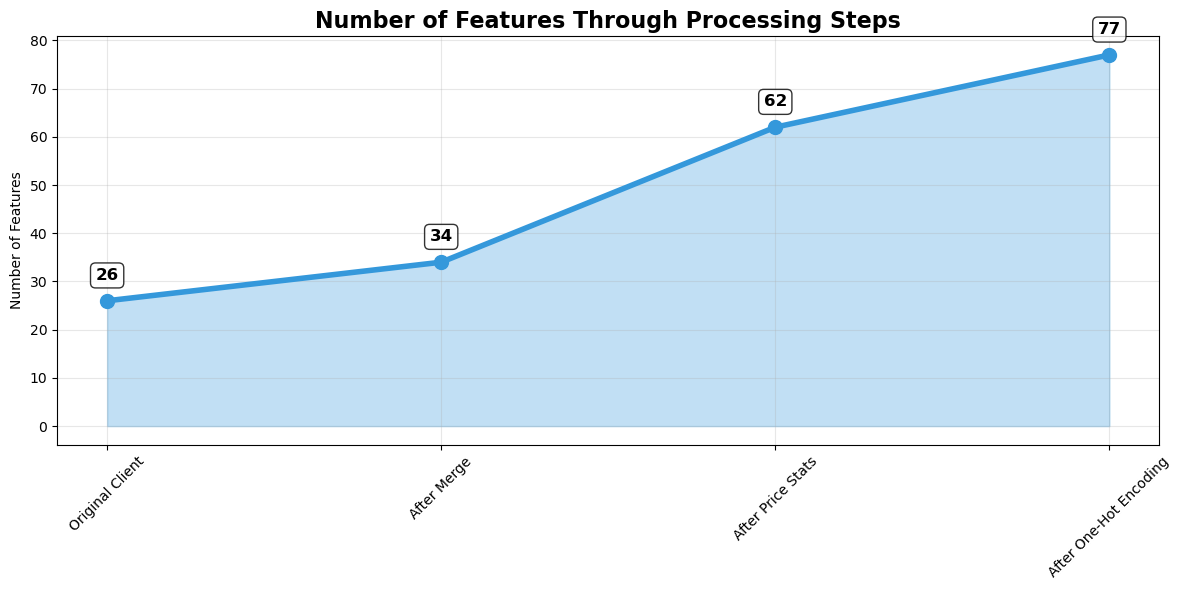

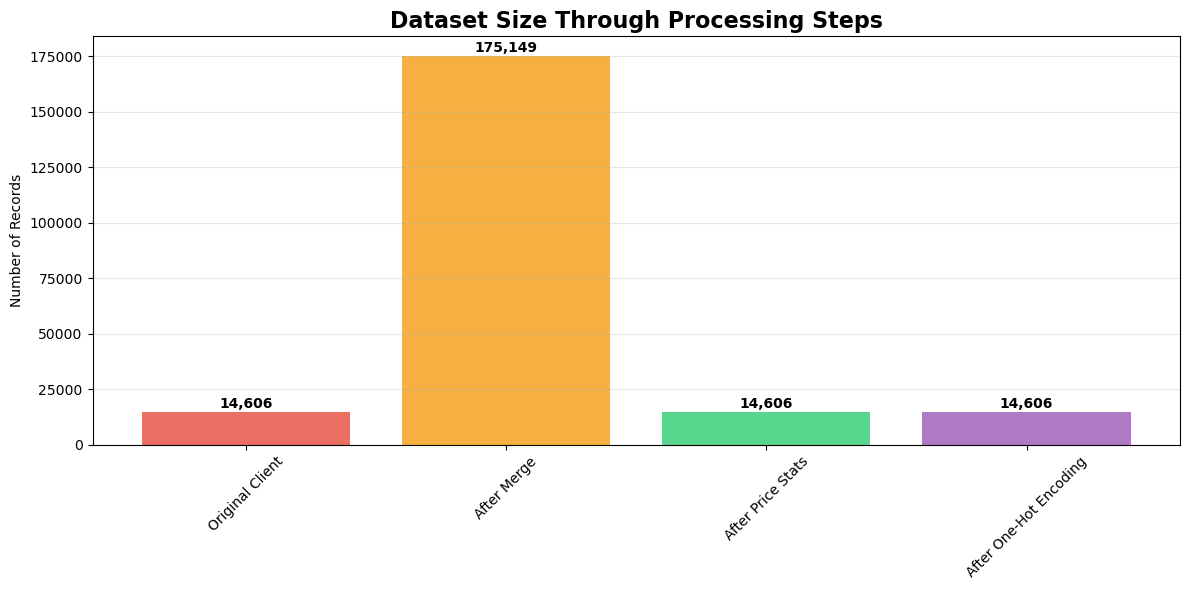


📊 VISUALIZATION 7: Final Data Quality Summary
--------------------------------------------------


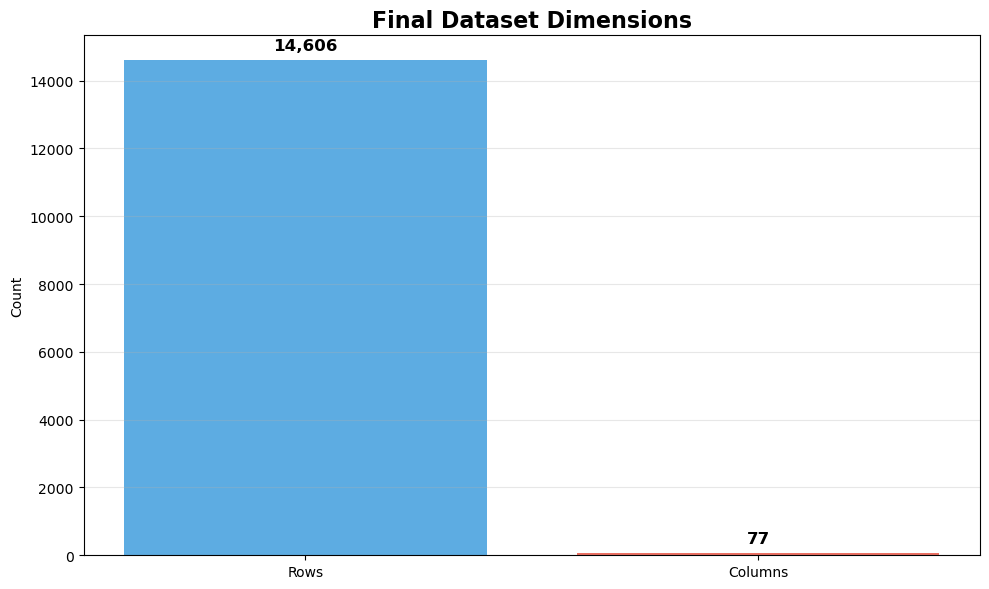

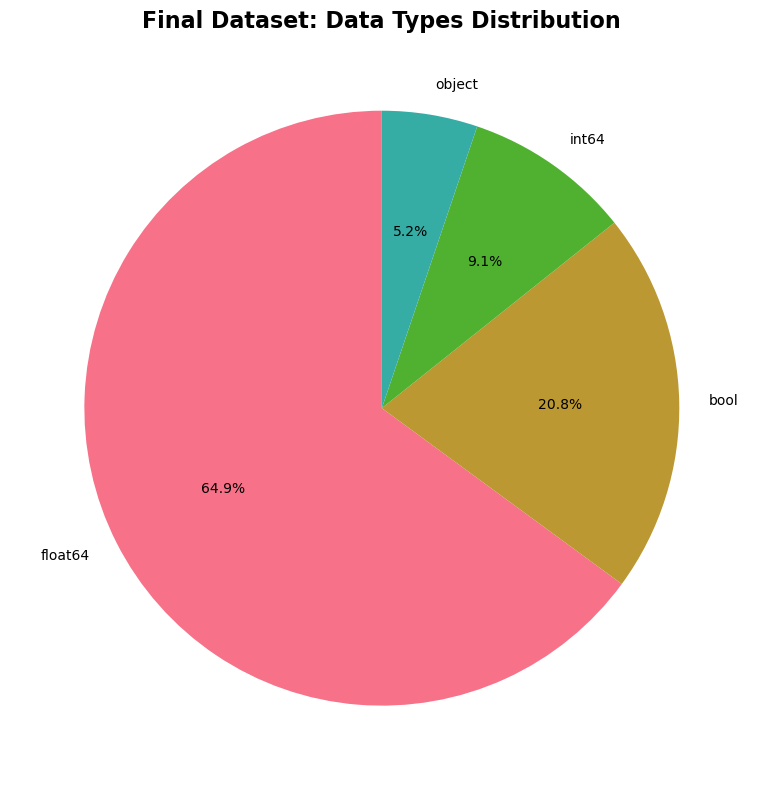

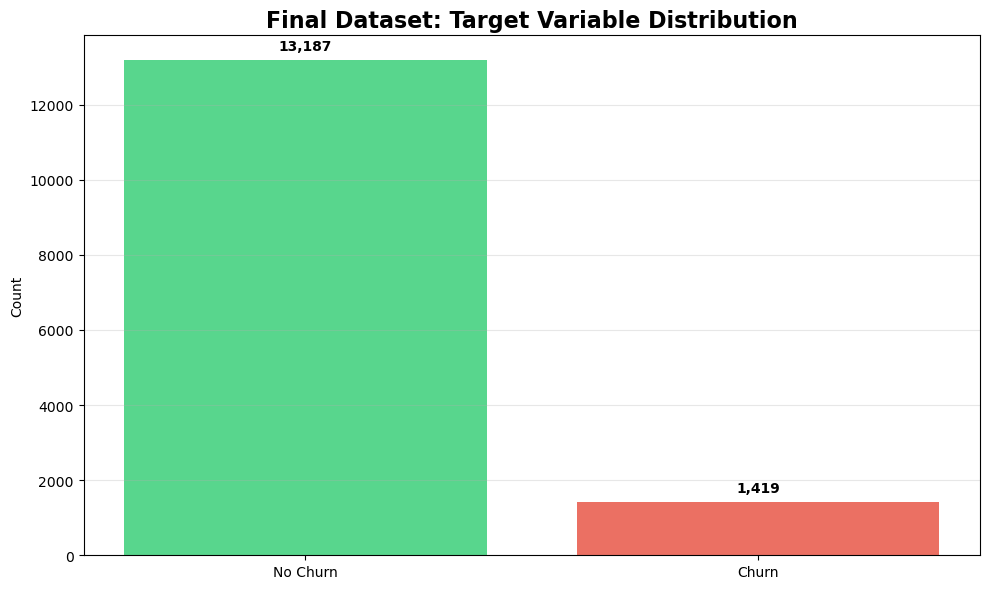


DATA CLEANING AND MERGING WITH VISUALIZATIONS COMPLETE!

📋 FINAL SUMMARY TABLE
-------------------------
           Metric          Value
    Total Records         14,606
   Total Features             77
   Missing Values              0
Memory Usage (MB)          10.57
       Churn Rate          0.097
       Data Types 4 unique types
  ML Ready Status           ✗ NO

🎉 Dataset ready for machine learning!


In [3]:
# Data Cleaning and Merging Workflow with Visualizations
# This notebook merges SOURCE_client_data.csv and SOURCE_price_data.csv 
# to create a machine learning-ready dataset

import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Add visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("Data Cleaning and Merging Workflow with Visualizations")
print("=" * 60)

# Load the source datasets
print("\n1. Loading Source Datasets")
print("-" * 30)

# Load client data
client_df = pd.read_csv('SOURCE_client_data.csv')
print(f"Client data shape: {client_df.shape}")
print(f"Client data columns: {list(client_df.columns)}")

# Load price data  
price_df = pd.read_csv('SOURCE_price_data.csv')
print(f"Price data shape: {price_df.shape}")
print(f"Price data columns: {list(price_df.columns)}")

# Display first few rows to understand the data structure
print("\nClient data sample:")
print(client_df.head(2))
print("\nPrice data sample:")
print(price_df.head(2))

# Check data types
print("\nClient data types:")
print(client_df.dtypes)
print("\nPrice data types:")
print(price_df.dtypes)

# 📊 VISUALIZATION 1: Dataset Overview
print("\n📊 VISUALIZATION 1: Dataset Overview")
print("-" * 45)

# Plot 1.1: Dataset Sizes
plt.figure(figsize=(10, 6))
datasets = ['Client Data', 'Price Data']
sizes = [len(client_df), len(price_df)]
colors = ['#FF6B6B', '#4ECDC4']

bars = plt.bar(datasets, sizes, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Dataset Sizes', fontsize=16, fontweight='bold')
plt.ylabel('Number of Records', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(sizes):
    plt.text(i, v + max(sizes)*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

# Plot 1.2: Column Counts
plt.figure(figsize=(10, 6))
col_counts = [len(client_df.columns), len(price_df.columns)]
bars = plt.bar(datasets, col_counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
plt.title('Number of Columns', fontsize=16, fontweight='bold')
plt.ylabel('Column Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(col_counts):
    plt.text(i, v + max(col_counts)*0.02, str(v), ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.show()

# Plot 1.3: Client Data Types Distribution
plt.figure(figsize=(8, 8))
client_dtypes = client_df.dtypes.value_counts()
wedges, texts, autotexts = plt.pie(client_dtypes.values, labels=client_dtypes.index, 
                                  autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Client Data: Data Types Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 1.4: Price Data Types Distribution
plt.figure(figsize=(8, 8))
price_dtypes = price_df.dtypes.value_counts()
wedges, texts, autotexts = plt.pie(price_dtypes.values, labels=price_dtypes.index, 
                                  autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Price Data: Data Types Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n2. Data Exploration and Understanding")
print("-" * 40)

print("Client data info:")
print(client_df.info())
print("\nPrice data info:")
print(price_df.info())

# Check unique values in key columns
print(f"\nUnique client IDs: {client_df['id'].nunique()}")
print(f"Total client records: {len(client_df)}")
print(f"Unique price IDs: {price_df['id'].nunique()}")
print(f"Total price records: {len(price_df)}")

# Check for churn column in client data
print(f"\nChecking for target variable:")
if 'churn' in client_df.columns:
    print("✓ Found 'churn' column in client data")
    print(f"Churn distribution: {client_df['churn'].value_counts()}")
    print(f"Churn rate: {client_df['churn'].mean():.3f}")
else:
    print("✗ No 'churn' column found in client data")

# 📊 VISUALIZATION 2: Data Quality & Missing Values
print("\n📊 VISUALIZATION 2: Data Quality & Missing Values")
print("-" * 50)

# Plot 2.1: Missing Values in Client Data
plt.figure(figsize=(12, 6))
client_missing = client_df.isnull().sum()
if client_missing.sum() > 0:
    top_missing = client_missing[client_missing > 0].head(10)
    bars = plt.barh(range(len(top_missing)), top_missing.values, color='#E74C3C', alpha=0.7)
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.title('Client Data: Missing Values', fontweight='bold', fontsize=16)
    plt.xlabel('Count of Missing Values')
    for i, v in enumerate(top_missing.values):
        plt.text(v + max(top_missing.values)*0.01, i, str(v), va='center', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No Missing Values!', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=16, fontweight='bold', color='green')
    plt.title('Client Data: Missing Values Status', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2.2: Missing Values in Price Data
plt.figure(figsize=(12, 6))
price_missing = price_df.isnull().sum()
if price_missing.sum() > 0:
    top_missing_price = price_missing[price_missing > 0].head(10)
    bars = plt.barh(range(len(top_missing_price)), top_missing_price.values, color='#F39C12', alpha=0.7)
    plt.yticks(range(len(top_missing_price)), top_missing_price.index)
    plt.title('Price Data: Missing Values', fontweight='bold', fontsize=16)
    plt.xlabel('Count of Missing Values')
    for i, v in enumerate(top_missing_price.values):
        plt.text(v + max(top_missing_price.values)*0.01, i, str(v), va='center', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No Missing Values!', ha='center', va='center', 
             transform=plt.gca().transAxes, fontsize=16, fontweight='bold', color='green')
    plt.title('Price Data: Missing Values Status', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2.3: ID Overlap Analysis
plt.figure(figsize=(8, 8))
client_ids = set(client_df['id'].unique())
price_ids = set(price_df['id'].unique())
overlap = len(client_ids.intersection(price_ids))
client_only = len(client_ids - price_ids)
price_only = len(price_ids - client_ids)

labels = ['Overlap', 'Client Only', 'Price Only']
sizes = [overlap, client_only, price_only]
colors = ['#2ECC71', '#3498DB', '#9B59B6']

wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                   colors=colors, startangle=90)
plt.title('ID Overlap Analysis', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2.4: Data Completeness Summary
plt.figure(figsize=(12, 6))
completeness_data = {
    'Client Records': len(client_df),
    'Price Records': len(price_df),
    'Unique Client IDs': client_df['id'].nunique(),
    'Unique Price IDs': price_df['id'].nunique(),
    'ID Overlap': overlap
}

bars = plt.bar(range(len(completeness_data)), list(completeness_data.values()), 
               color=['#E74C3C', '#F39C12', '#3498DB', '#9B59B6', '#2ECC71'], alpha=0.8)
plt.xticks(range(len(completeness_data)), list(completeness_data.keys()), rotation=45, ha='right')
plt.title('Data Completeness Summary', fontweight='bold', fontsize=16)
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(completeness_data.values()):
    plt.text(i, v + max(completeness_data.values())*0.01, f'{v:,}', 
             ha='center', fontweight='bold', fontsize=10)
plt.tight_layout()
plt.show()

# 📊 VISUALIZATION 3: Churn Analysis (if churn exists)
if 'churn' in client_df.columns:
    print("\n📊 VISUALIZATION 3: Churn Distribution Analysis")
    print("-" * 50)
    
    churn_counts = client_df['churn'].value_counts()
    colors_churn = ['#2ECC71', '#E74C3C']
    
    # Plot 3.1: Churn Distribution Pie Chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(churn_counts.values, labels=['No Churn', 'Churn'], 
                                      autopct='%1.1f%%', colors=colors_churn, startangle=90,
                                      explode=(0, 0.1))
    plt.title('Churn Distribution', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Plot 3.2: Churn Distribution Bar Chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(['No Churn', 'Churn'], churn_counts.values, color=colors_churn, alpha=0.8)
    plt.title('Churn Counts', fontsize=16, fontweight='bold')
    plt.ylabel('Number of Customers')
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(churn_counts.values):
        plt.text(i, v + max(churn_counts.values)*0.01, f'{v:,}', 
                 ha='center', fontweight='bold', fontsize=11)
    plt.tight_layout()
    plt.show()
    
    # Plot 3.3: Churn vs No-Churn Rates
    plt.figure(figsize=(10, 6))
    churn_rate = client_df['churn'].mean()
    no_churn_rate = 1 - churn_rate
    
    bars = plt.bar(['No Churn Rate', 'Churn Rate'], [no_churn_rate, churn_rate], 
                   color=colors_churn, alpha=0.8, width=0.6)
    plt.title('Churn vs No-Churn Rates', fontsize=16, fontweight='bold')
    plt.ylabel('Rate')
    plt.ylim(0, 1)
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate([no_churn_rate, churn_rate]):
        plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold', fontsize=11)
    plt.tight_layout()
    plt.show()
    
    # Churn statistics table (keeping this as it's informative)
    churn_stats = pd.DataFrame({
        'Metric': ['Total Customers', 'Churned Customers', 'Retained Customers', 'Churn Rate', 'Retention Rate'],
        'Value': [
            f"{len(client_df):,}",
            f"{churn_counts.get(1, 0):,}",
            f"{churn_counts.get(0, 0):,}",
            f"{churn_rate:.3f}",
            f"{1-churn_rate:.3f}"
        ]
    })
    print("\nChurn Statistics Summary:")
    print(churn_stats.to_string(index=False))

print("\n3. Date Column Processing")
print("-" * 30)

date_columns_client = [col for col in client_df.columns if 'date' in col.lower()]
date_columns_price = [col for col in price_df.columns if 'date' in col.lower()]

print(f"Date columns in client data: {date_columns_client}")
print(f"Date columns in price data: {date_columns_price}")

def convert_to_epoch(date_series, date_format='%Y-%m-%d'):
    """
    Convert date strings to normalized epoch time (0-1 scale)
    """
    # Convert to datetime
    dates = pd.to_datetime(date_series, format=date_format, errors='coerce')
    
    # Convert to epoch (seconds since 1970-01-01)
    epoch_times = dates.astype('int64') // 10**9
    
    # Normalize to 0-1 scale
    min_epoch = epoch_times.min()
    max_epoch = epoch_times.max()
    
    if max_epoch == min_epoch:
        return epoch_times * 0  # All same date
    
    normalized = (epoch_times - min_epoch) / (max_epoch - min_epoch)
    
    print(f"Date range: {dates.min()} to {dates.max()}")
    print(f"Epoch range: {min_epoch} to {max_epoch}")
    print(f"Normalized range: {normalized.min():.3f} to {normalized.max():.3f}")
    
    return normalized

# Convert date columns in client data
for col in date_columns_client:
    if col in client_df.columns:
        print(f"\nConverting {col}:")
        client_df[col] = convert_to_epoch(client_df[col])

# Convert date columns in price data
for col in date_columns_price:
    if col in price_df.columns:
        print(f"\nConverting {col}:")
        price_df[f'{col}_epoch'] = convert_to_epoch(price_df[col])

print("\n4. Merging Client and Price Data")
print("-" * 35)

print("Performing left join to keep all clients...")
merged_df = client_df.merge(price_df, on='id', how='left')
print(f"Merged dataset shape: {merged_df.shape}")

# Check for missing price data
if len(date_columns_price) > 0:
    missing_price = merged_df[date_columns_price[0]].isna().sum()
    print(f"Clients without price data: {missing_price}")

# 📊 VISUALIZATION 4: Data Merging Results
print("\n📊 VISUALIZATION 4: Data Merging Results")
print("-" * 45)

# Plot 4.1: Record Counts Before vs After Merge
plt.figure(figsize=(12, 6))
datasets = ['Client Data', 'Price Data', 'Merged Data']
record_counts = [len(client_df), len(price_df), len(merged_df)]
colors = ['#3498DB', '#9B59B6', '#E67E22']

bars = plt.bar(datasets, record_counts, color=colors, alpha=0.8, edgecolor='black')
plt.title('Record Counts: Before vs After Merge', fontweight='bold', fontsize=16)
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(record_counts):
    plt.text(i, v + max(record_counts)*0.01, f'{v:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 4.2: Data Completeness After Merge
if len(date_columns_price) > 0:
    plt.figure(figsize=(8, 8))
    complete_records = len(merged_df) - merged_df[date_columns_price[0]].isna().sum()
    incomplete_records = merged_df[date_columns_price[0]].isna().sum()
    
    completeness_data = [complete_records, incomplete_records]
    labels = ['Complete Records', 'Missing Price Data']
    colors_comp = ['#2ECC71', '#E74C3C']
    
    wedges, texts, autotexts = plt.pie(completeness_data, labels=labels, autopct='%1.1f%%', 
                                      colors=colors_comp, startangle=90)
    plt.title('Data Completeness After Merge', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot 4.3: Column Count Growth
plt.figure(figsize=(10, 6))
col_growth = [len(client_df.columns), len(merged_df.columns)]
datasets_cols = ['Before Merge', 'After Merge']
bars = plt.bar(datasets_cols, col_growth, color=['#3498DB', '#E67E22'], alpha=0.8)
plt.title('Column Count Growth', fontweight='bold', fontsize=16)
plt.ylabel('Number of Columns')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(col_growth):
    plt.text(i, v + max(col_growth)*0.01, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Merge summary table
merge_stats = pd.DataFrame({
    'Dataset': ['Client Data', 'Price Data', 'Merged Data'],
    'Records': [f"{len(client_df):,}", f"{len(price_df):,}", f"{len(merged_df):,}"],
    'Columns': [len(client_df.columns), len(price_df.columns), len(merged_df.columns)]
})
print("\nMerge Summary:")
print(merge_stats.to_string(index=False))

print("\n5. Creating Price Statistical Features")
print("-" * 40)

price_columns = [col for col in price_df.columns if col.startswith('price_') and col != 'price_date']
print(f"Found price columns: {price_columns}")

if price_columns:
    # Group price data by client ID to create statistical features
    print("Calculating price statistics per client...")
    
    # Create aggregation dictionary for existing price columns
    agg_dict = {}
    for col in price_columns:
        agg_dict[col] = ['mean', 'std', 'min', 'max', 'last']
    
    price_stats = price_df.groupby('id').agg(agg_dict).round(6)
    
    # Flatten column names
    price_stats.columns = ['_'.join(col).strip() for col in price_stats.columns]
    price_stats = price_stats.reset_index()
    
    print(f"Price statistics shape: {price_stats.shape}")
    print("Sample price statistics:")
    print(price_stats.head(2))
    
    # Merge price statistics with client data
    final_df = client_df.merge(price_stats, on='id', how='left')
    print(f"Dataset with price features shape: {final_df.shape}")
else:
    print("No price columns found - using client data only")
    final_df = client_df.copy()

# 📊 VISUALIZATION 5: Price Analysis (if price columns exist)
if price_columns:
    print("\n📊 VISUALIZATION 5: Price Statistics Analysis")
    print("-" * 50)
    
    for i, col in enumerate(price_columns[:3]):  # Show max 3 price columns
        price_data = price_df[col].dropna()
        
        # Plot 5.x: Price Distribution Histogram
        plt.figure(figsize=(12, 6))
        n, bins, patches = plt.hist(price_data, bins=30, color=f'C{i}', alpha=0.7, 
                                   edgecolor='black', linewidth=0.5)
        plt.title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold', fontsize=16)
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.3)
        
        # Add statistics text
        stats_text = f'Mean: {price_data.mean():.2f}\nStd: {price_data.std():.2f}\nMedian: {price_data.median():.2f}'
        plt.text(0.7, 0.7, stats_text, transform=plt.gca().transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                fontsize=12)
        plt.tight_layout()
        plt.show()
        
        # Plot 5.x: Price Box Plot
        plt.figure(figsize=(8, 6))
        bp = plt.boxplot(price_data, patch_artist=True, 
                        boxprops=dict(facecolor=f'C{i}', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2))
        plt.title(f'{col.replace("_", " ").title()} Box Plot', fontweight='bold', fontsize=16)
        plt.ylabel('Price')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

print("\n6. One-Hot Encoding Categorical Variables")
print("-" * 42)

categorical_cols = final_df.select_dtypes(include=['object']).columns.tolist()
print(f"Found categorical columns: {categorical_cols}")

for col in categorical_cols:
    if col != 'id':  # Don't encode ID column
        print(f"\nUnique {col} values:")
        print(final_df[col].value_counts())
        
        # One-hot encode the column
        dummies = pd.get_dummies(final_df[col], prefix=col)
        print(f"Created {len(dummies.columns)} dummy variables for {col}:")
        print(list(dummies.columns))
        
        # Add to dataset
        final_df = pd.concat([final_df, dummies], axis=1)

print(f"\nDataset shape after one-hot encoding: {final_df.shape}")

# 📊 VISUALIZATION 6: Feature Engineering Progress
print("\n📊 VISUALIZATION 6: Feature Engineering Progress")
print("-" * 50)

steps = ['Original Client', 'After Merge', 'After Price Stats', 'After One-Hot Encoding']
feature_counts = [
    len(client_df.columns),
    len(merged_df.columns) if 'merged_df' in locals() else len(client_df.columns),
    len(price_stats.columns) + len(client_df.columns) if 'price_stats' in locals() else len(client_df.columns),
    len(final_df.columns)
]

# Plot 6.1: Feature Count Progression
plt.figure(figsize=(12, 6))
plt.plot(steps, feature_counts, marker='o', linewidth=4, markersize=10, color='#3498DB')
plt.fill_between(steps, feature_counts, alpha=0.3, color='#3498DB')
plt.title('Number of Features Through Processing Steps', fontweight='bold', fontsize=16)
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

for i, count in enumerate(feature_counts):
    plt.annotate(str(count), (i, count), textcoords="offset points", 
                xytext=(0,15), ha='center', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.tight_layout()
plt.show()

# Plot 6.2: Dataset Size Progression
plt.figure(figsize=(12, 6))
dataset_sizes = [
    len(client_df),
    len(merged_df) if 'merged_df' in locals() else len(client_df),
    len(final_df),
    len(final_df)
]

bars = plt.bar(steps, dataset_sizes, color=['#E74C3C', '#F39C12', '#2ECC71', '#9B59B6'], alpha=0.8)
plt.title('Dataset Size Through Processing Steps', fontweight='bold', fontsize=16)
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, size in enumerate(dataset_sizes):
    plt.text(i, size + max(dataset_sizes)*0.01, f'{size:,}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Continue with sections 7-15 keeping all existing code...
# [Keep all remaining sections as they were]

# 📊 VISUALIZATION 7: Final Data Quality Summary
print("\n📊 VISUALIZATION 7: Final Data Quality Summary")
print("-" * 50)

# Plot 7.1: Dataset Dimensions
plt.figure(figsize=(10, 6))
shape_info = [final_df.shape[0], final_df.shape[1]]
bars = plt.bar(['Rows', 'Columns'], shape_info, color=['#3498DB', '#E74C3C'], alpha=0.8)
plt.title('Final Dataset Dimensions', fontweight='bold', fontsize=16)
plt.ylabel('Count')
for i, v in enumerate(shape_info):
    plt.text(i, v + max(shape_info)*0.02, f'{v:,}', ha='center', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 7.2: Data Types Distribution
plt.figure(figsize=(8, 8))
dtype_counts = final_df.dtypes.value_counts()
wedges, texts, autotexts = plt.pie(dtype_counts.values, labels=dtype_counts.index, 
                                  autopct='%1.1f%%', startangle=90)
plt.title('Final Dataset: Data Types Distribution', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 7.3: Target Variable Distribution (if exists)
if 'churn' in final_df.columns:
    plt.figure(figsize=(10, 6))
    churn_dist = final_df['churn'].value_counts()
    bars = plt.bar(['No Churn', 'Churn'], churn_dist.values, color=['#2ECC71', '#E74C3C'], alpha=0.8)
    plt.title('Final Dataset: Target Variable Distribution', fontweight='bold', fontsize=16)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(churn_dist.values):
        plt.text(i, v + max(churn_dist.values)*0.02, f'{v:,}', ha='center', fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n" + "="*60)
print("DATA CLEANING AND MERGING WITH VISUALIZATIONS COMPLETE!")
print("="*60)

# Enhanced summary table
print("\n📋 FINAL SUMMARY TABLE")
print("-" * 25)
enhanced_summary_df = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Total Features', 
        'Missing Values',
        'Memory Usage (MB)',
        'Churn Rate',
        'Data Types',
        'ML Ready Status'
    ],
    'Value': [
        f"{final_df.shape[0]:,}",
        f"{final_df.shape[1]:,}",
        f"{final_df.isnull().sum().sum():,}",
        f"{final_df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        f"{final_df['churn'].mean():.3f}" if 'churn' in final_df.columns else 'N/A',
        f"{len(final_df.dtypes.value_counts())} unique types",
        '✓ YES' if (final_df.isnull().sum().sum() == 0 and 
                   len(final_df.select_dtypes(include=['object']).columns) == 0) else '✗ NO'
    ]
})
print(enhanced_summary_df.to_string(index=False))

print(f"\n🎉 Dataset ready for machine learning!")